# **Lendo a base de dados MNIST**


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print('Qtd. itens no conj. de treinamento:', len(X_train))
print('Qtd. itens no conj. de teste:', len(X_test))
print('Formato dos dados:', X_train.shape)
print('Formato dos rótulos:', y_train.shape)
print("Número de classes:", len(set(y_train)))

print('\nExemplo de uma imagem:')
print(X_train[1])
print('\nExemplos de 5 rótulos:')
print(y_train[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Qtd. itens no conj. de treinamento: 60000
Qtd. itens no conj. de teste: 10000
Formato dos dados: (60000, 28, 28)
Formato dos rótulos: (60000,)
Número de classes: 10

Exemplo de uma imagem:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 

# **Preparando os dados**

In [ ]:
# Normalizando os dados
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print('\nExemplo de uma imagem normalizada:')
print(X_train[1])


Exemplo de uma imagem normalizada:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.      

# **One-hot encoding**

In [ ]:
# faz o encoding com Keras
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test_multilabel = y_test
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print('\nExemplos de 5 rótulos one-hot:')
print(y_train[:5])


Exemplos de 5 rótulos one-hot:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# **Definindo a arquitetura da rede**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

def greedy_layer_wise_training(model, X_train, y_train, X_test, y_test):
    """Trains a model using greedy layer-wise training."""

    epochs_per_layer=10
    for i in range(1, len(model.layers)):
        # Freeze all layers except the current one
        for layer in model.layers[:i]:
            layer.trainable = False
        for layer in model.layers[i:]:
            layer.trainable = True

        # Compile the model for the current layer
        model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

        # Train the current layer
        model.fit(X_train, y_train, validation_split=.1, epochs=epochs_per_layer, verbose=2)

        # Evaluate the  model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"layer: {i}")
        print(f"Test Loss: {loss:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")


# Start a timer.
import time
start_time = time.time()


# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1569, activation='relu'))
model.add(Dense(784, activation='relu'))
model.add(Dense(392, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Perform greedy layer-wise training
greedy_layer_wise_training(model, X_train, y_train, X_test, y_test)

# Evaluate the final model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, InputLayer as Inputlayer

def greedy_layer_wise_training(model, X_train, y_train, X_test, y_test):
    """Trains a model using greedy layer-wise training."""

    epochs_per_layer=10
    for i in range(1, len(model.layers)):
        # Freeze all layers except the current one
        for layer in model.layers[:i]:
            layer.trainable = False
        for layer in model.layers[i:]:
            layer.trainable = True

        # Compile the model for the current layer
        model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

        # Train the current layer
        model.fit(X_train, y_train, validation_split=.1, epochs=epochs_per_layer, verbose=2)

        # Evaluate the  model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"layer: {i}")
        print(f"Test Loss: {loss:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")


# Start a timer.
import time
start_time = time.time()


# Define the model architecture
model = Sequential()
model.add(Inputlayer(input_shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Perform greedy layer-wise training
greedy_layer_wise_training(model, X_train, y_train, X_test, y_test)

# Evaluate the final model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
1688/1688 - 12s - 7ms/step - categorical_accuracy: 0.9360 - loss: 0.2082 - val_categorical_accuracy: 0.9838 - val_loss: 0.0550
Epoch 2/10
1688/1688 - 13s - 8ms/step - categorical_accuracy: 0.9808 - loss: 0.0638 - val_categorical_accuracy: 0.9883 - val_loss: 0.0430
Epoch 3/10
1688/1688 - 4s - 3ms/step - categorical_accuracy: 0.9854 - loss: 0.0475 - val_categorical_accuracy: 0.9885 - val_loss: 0.0421
Epoch 4/10
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9879 - loss: 0.0387 - val_categorical_accuracy: 0.9913 - val_loss: 0.0331
Epoch 5/10
1688/1688 - 4s - 2ms/step - categorical_accuracy: 0.9905 - loss: 0.0311 - val_categorical_accuracy: 0.9890 - val_loss: 0.0423
Epoch 6/10
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9919 - loss: 0.0259 - val_categorical_accuracy: 0.9913 - val_loss: 0.0354
Epoch 7/10
1688/1688 - 5s - 3ms/step - categorical_accuracy: 0.9925 - loss: 0.0232 - val_categorical_accuracy: 0.9913 - val_loss: 0.0333
Epoch 8/10
1688/1688 - 4s - 2ms/step - 

# **Visualizando a rede criada**

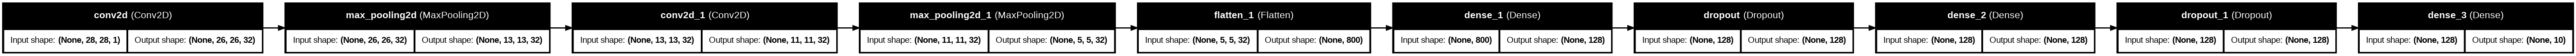

In [ ]:
#model=create_model()
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,480 (517.50 KB)

 Trainable params: 1,290 (5.04 KB)

 Non-trainable params: 128,608 (502.38 KB)

 Optimizer params: 2,582 (10.09 KB)

In [ ]:
# Unreeze all layers
for layer in model.layers:
  print(layer)
  layer.trainable = True

# Compile the model
model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=.1, epochs=10, verbose=2)


# end the timer and print the time
end_time = time.time()
print("Tempo de execução: {:.2f} segundos".format(end_time - start_time))


<Conv2D name=conv2d, built=True>
<MaxPooling2D name=max_pooling2d, built=True>
<Conv2D name=conv2d_1, built=True>
<MaxPooling2D name=max_pooling2d_1, built=True>
<Flatten name=flatten_1, built=True>
<Dense name=dense_1, built=True>
<Dropout name=dropout, built=True>
<Dense name=dense_2, built=True>
<Dropout name=dropout_1, built=True>
<Dense name=dense_3, built=True>
Epoch 1/10
1688/1688 - 10s - 6ms/step - categorical_accuracy: 0.9964 - loss: 0.0209 - val_categorical_accuracy: 0.9920 - val_loss: 0.0733
Epoch 2/10
1688/1688 - 6s - 4ms/step - categorical_accuracy: 0.9971 - loss: 0.0128 - val_categorical_accuracy: 0.9903 - val_loss: 0.0886
Epoch 3/10
1688/1688 - 4s - 3ms/step - categorical_accuracy: 0.9970 - loss: 0.0125 - val_categorical_accuracy: 0.9922 - val_loss: 0.0863
Epoch 4/10
1688/1688 - 6s - 3ms/step - categorical_accuracy: 0.9965 - loss: 0.0156 - val_categorical_accuracy: 0.9915 - val_loss: 0.0689
Epoch 5/10
1688/1688 - 5s - 3ms/step - categorical_accuracy: 0.9966 - loss: 0.013

# **Avaliando o treinamento**

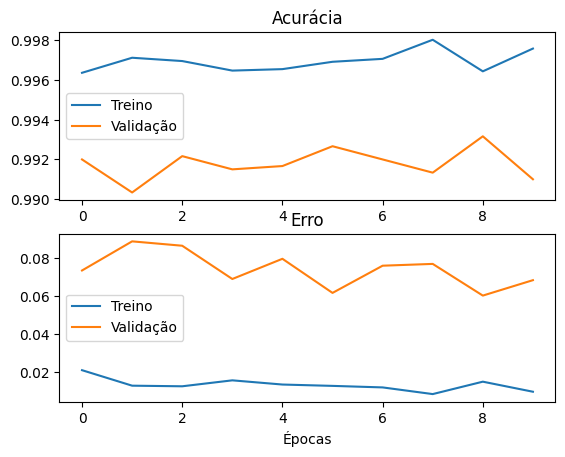

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['categorical_accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_categorical_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

# **Calculando métricas de aprendizado da rede**

In [ ]:
#Calculando classes preditas para os valores de teste

y_pred = model.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.8175903e-37 2.0348348e-23 8.4230629e-23 ... 1.0000000e+00
  2.0981986e-34 1.3864918e-26]
 [2.4346638e-30 1.9110273e-36 1.0000000e+00 ... 5.6051939e-45
  3.9898919e-34 0.0000000e+00]
 [2.7497665e-31 1.0000000e+00 1.6737902e-23 ... 1.1631711e-22
  3.2119614e-22 4.7435031e-34]
 ...
 [6.8893270e-38 1.5392151e-26 1.0310590e-37 ... 3.5846556e-27
  1.8649340e-31 4.6224285e-26]
 [5.7445036e-26 2.7409270e-24 3.7658392e-28 ... 4.0213589e-24
  4.0720005e-12 4.0510296e-16]
 [2.6810374e-27 1.6060096e-27 2.3341567e-26 ... 4.2038954e-45
  2.2258800e-29 1.1336505e-42]]


In [ ]:
# Comparando os valores preditos com os reais
y_pred = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred)

Classes reais:		 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelBinarizer
print(classification_report(y_test_multilabel, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9899    0.9980    0.9939       980
           1     0.9956    0.9974    0.9965      1135
           2     0.9961    0.9903    0.9932      1032
           3     0.9853    0.9980    0.9916      1010
           4     0.9918    0.9908    0.9913       982
           5     0.9899    0.9899    0.9899       892
           6     0.9958    0.9854    0.9906       958
           7     0.9884    0.9932    0.9908      1028
           8     0.9928    0.9918    0.9923       974
           9     0.9940    0.9841    0.9890      1009

    accuracy                         0.9920     10000
   macro avg     0.9920    0.9919    0.9919     10000
weighted avg     0.9920    0.9920    0.9920     10000



# **Matriz de Confusão**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_multilabel, y_pred)
print(cm)

[[ 978    1    0    0    0    0    0    1    0    0]
 [   0 1132    0    2    0    1    0    0    0    0]
 [   3    1 1022    1    0    0    0    5    0    0]
 [   0    0    0 1008    0    2    0    0    0    0]
 [   0    0    0    0  973    0    3    2    1    3]
 [   0    0    0    7    0  883    1    0    1    0]
 [   4    2    1    0    1    3  944    0    3    0]
 [   0    0    2    2    0    0    0 1021    2    1]
 [   3    0    1    1    0    1    0    0  966    2]
 [   0    1    0    2    7    2    0    4    0  993]]


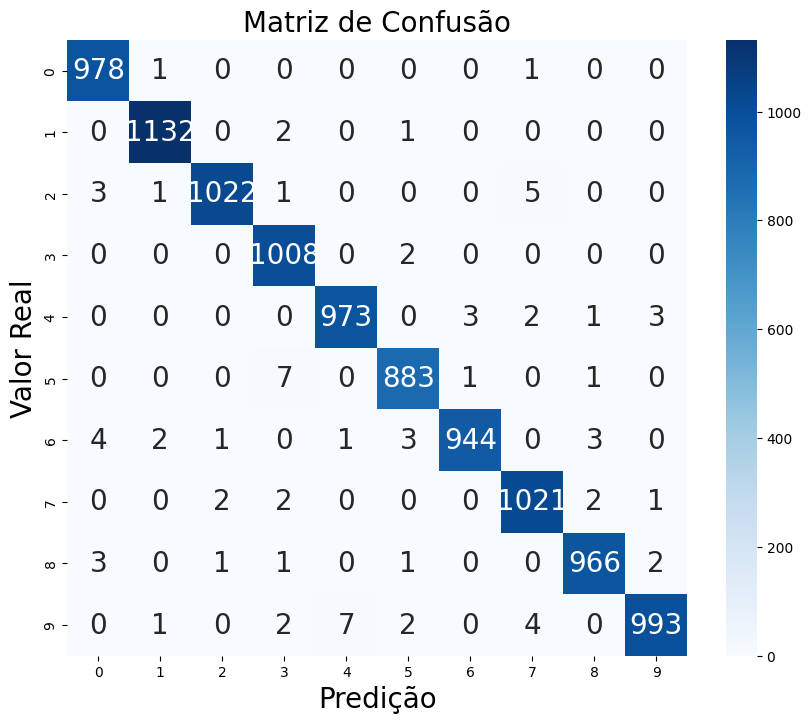

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()

# **Conclusão**

Este colab apresentou um exemplo clássico de classificação de uma base de dados utilizando redes neurais MLP.